# 5001 Mini Project

## ZHANG Juntao - 20908272

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numba
from numba import njit,prange,set_num_threads
import warnings
# warnings.filterwarnings('ignore')

### Problem 1: ODE

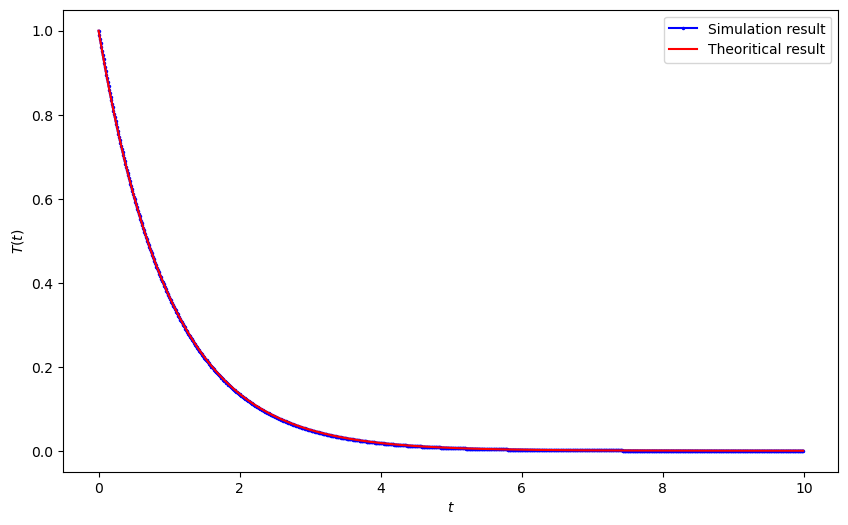

In [2]:
delta_t = 0.01
T = [1, 1-delta_t]
iteration = 998
for i in range(iteration):
    T.append(T[-1] * (1 - delta_t))
t = np.arange(0, 10, 0.01)
T_theory = list(map(lambda x: np.exp(-x), t))

plt.figure(figsize=(10,6))
plt.plot(t, T, label='Simulation result', c='blue', marker='.', markersize=3)
plt.plot(t, T_theory, label='Theoritical result', c='red')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$T(t)$')
plt.show()

### Problem 2: PDE

In [3]:
T = np.ones((100, 100)) * 20
T[0,:] = 40
T[:,-1] = 40
T[:,0] = 40
T[-1,:] = 20

In [4]:
@njit(parallel=True)
def simulation(T, dt, dh, k=0.5):
    T_new = np.copy(T)
    for ax in prange(1, 99):
        for ay in prange(1, 99):
            surr = T[ax-1,ay]+T[ax+1,ay]+T[ax,ay-1]+T[ax,ay+1]
            T_new[ax, ay] = T[ax,ay] + k * dt / dh**2 * (surr - 4*T[ax,ay])
    return T_new

In [5]:
start = time.perf_counter()
T_total = []
T_total.append(T)
for i in range(5999):
    T = simulation(T, dt=0.1, dh=0.5)
    T_total.append(T)
print('time cost:', time.perf_counter()-start)

time cost: 0.8368497909999997


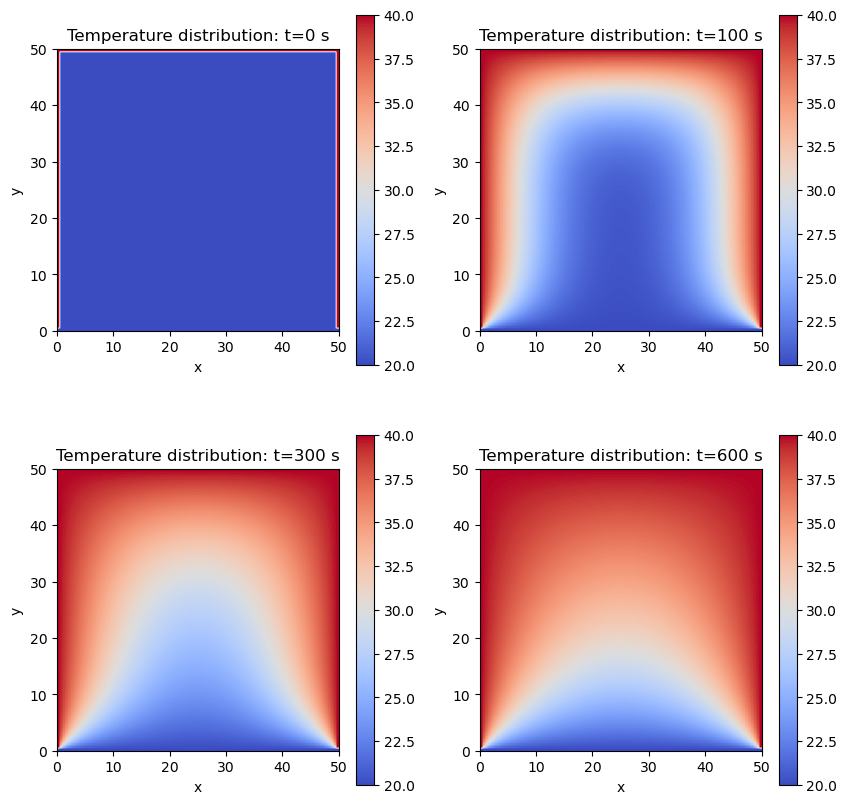

In [6]:
plt.figure(figsize = (10,10))
plt.subplot(2, 2, 1)
plt.title("Temperature distribution: t=0 s")
plt.imshow(T_total[0], cmap="coolwarm", extent= [0,50,0,50])
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(2, 2, 2)
plt.title("Temperature distribution: t=100 s")
plt.imshow(T_total[999], cmap="coolwarm", extent= [0,50,0,50])
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(2, 2, 3)
plt.title("Temperature distribution: t=300 s")
plt.imshow(T_total[2999], cmap="coolwarm", extent= [0,50,0,50])
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(2, 2, 4)
plt.title("Temperature distribution: t=600 s")
plt.imshow(T_total[5999], cmap="coolwarm", extent= [0,50,0,50])
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
# plt.savefig('2.png')
plt.show()

In [7]:
@njit(parallel=True)
def test(T, dt, dh, k=0.5):
    T_new = np.copy(T)
    for ax in prange(1, 99):
        for ay in prange(1, 99):
            surr = T[ax-1,ay]+T[ax+1,ay]+T[ax,ay-1]+T[ax,ay+1]
            T_new[ax, ay] = T[ax,ay] + k * dt / dh**2 * (surr - 4*T[ax,ay])
    return T_new


def init_T():
    T = np.ones((100, 100)) * 20
    T[0,:] = 40
    T[:,-1] = 40
    T[:,0] = 40
    T[-1,:] = 20
    return T

def cal_time():
    start = time.perf_counter()
    for i in range(1000):
        a = test(init_T(), dt=0.1, dh=0.5)
    print('time cost:' ,(time.perf_counter()-start))
    return time.perf_counter()-start

In [8]:
times = np.zeros(8)
for i in range(1,9):
    set_num_threads(i)
    times[i-1] = cal_time()

time cost: 0.2433892920000007
time cost: 0.027268000000000292
time cost: 0.038445624999999595
time cost: 0.04077212500000016
time cost: 0.04138458300000014
time cost: 0.048669292000000475
time cost: 0.04680312500000028
time cost: 0.03920279200000021


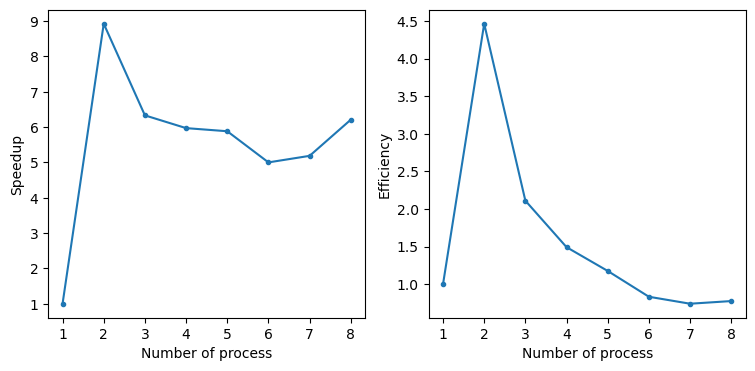

In [10]:
cores = [i for i in range(1,9)]
speedup = times[0]/times
efficiency = speedup/cores
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
plt.plot(cores, speedup, marker='.')
plt.xlabel('Number of process')
plt.ylabel('Speedup')
plt.xticks([i for i in range(1,9)])
plt.subplot(1, 2, 2)
plt.plot(cores, efficiency, marker='.')
plt.xlabel('Number of process')
plt.ylabel('Efficiency')
plt.xticks([i for i in range(1,9)])
# plt.savefig('2.png')
plt.show()